In [12]:
import pandas as pd
import numpy as np
import sklearn as sk

In [13]:
#loading the data 
data = pd.read_csv('/content/abalone.csv')

In [14]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [15]:
data.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [23]:
data.shape

 

(4177, 9)

data preprocessing

In [24]:
#missing values
data.isnull().sum()



Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [58]:
# remove unwanted columns
data = data.drop(columns = ['Sex'],axis = 1)

In [59]:
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


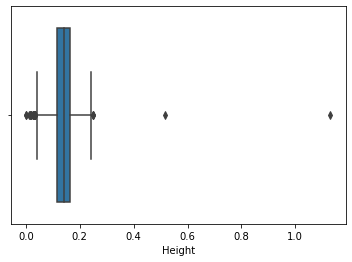

In [37]:
# deal with outlier
import seaborn as sns
sns.boxplot(data.Height)

In [38]:
# Encoding
pd.get_dummies(data['Height'])

,0.000,0.010,0.015,0.020,0.025,0.030,0.035,0.040,0.045,0.050,...,0.210,0.215,0.220,0.225,0.230,0.235,0.240,0.250,0.515,1.130
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4172,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4173,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4174,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4175,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
# scaling
from sklearn.preprocessing import MinMaxScaler

In [61]:
scale = MinMaxScaler(feature_range=(0,1))

In [62]:
y = data['Rings']
x = data.drop(columns=['Rings'],axis = 1)

In [64]:
names = x.columns
names

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight'],
      dtype='object')

In [66]:
x = scale.fit_transform(x)
x

array([[0.51351351, 0.5210084 , 0.0840708 , ..., 0.15030262, 0.1323239 ,
        0.14798206],
       [0.37162162, 0.35294118, 0.07964602, ..., 0.06624075, 0.06319947,
        0.06826109],
       [0.61486486, 0.61344538, 0.11946903, ..., 0.17182246, 0.18564845,
        0.2077728 ],
       ...,
       [0.70945946, 0.70588235, 0.18141593, ..., 0.3527236 , 0.37788018,
        0.30543099],
       [0.74324324, 0.72268908, 0.13274336, ..., 0.35642233, 0.34298881,
        0.29347285],
       [0.85810811, 0.84033613, 0.17256637, ..., 0.63517149, 0.49506254,
        0.49177877]])

In [68]:
#train and test

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [89]:
from sklearn.linear_model import LogisticRegression


In [90]:
model = LogisticRegression()

In [92]:
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [93]:
# test with train data
pred = model.predict(x_train)

pred

array([ 6,  8, 10, ...,  9,  8,  8])

In [87]:
from sklearn import metrics

In [94]:
metrics.accuracy_score(pred,y_train)

0.26967973660580663

In [96]:
pred = model.predict(x_test)

In [97]:
metrics.accuracy_score(pred,y_test)

0.25239234449760767